In [127]:
import pandas as pd
import numpy as np

df4 = pd.read_csv('avocado cleaned.csv', encoding = 'UTF-8', sep=',')

print(df4)

             Date  AveragePrice  TotalVolume   plu4046   plu4225  plu4770  \
0        1/4/2015      1.220000     40873.28   2819.50  28287.42    49.90   
1        1/4/2015      1.790000      1373.95     57.42    153.88     0.00   
2       1/11/2015      1.240000     41195.08   1002.85  31640.34   127.12   
3       1/11/2015      1.770000      1182.56     39.00    305.12     0.00   
4       1/18/2015      1.170000     44511.28    914.14  31540.32   135.77   
...           ...           ...          ...       ...       ...      ...   
41020  11/14/2021      1.851641      2326.92    350.66      5.44     0.00   
41021  11/21/2021      1.004960     80092.30  18981.16   2171.01     9.36   
41022  11/21/2021      1.869482      2380.46    288.29      2.17     0.00   
41023  11/28/2021      1.008266     70289.47  16251.89   1464.33     6.10   
41024  11/28/2021      1.866433      2211.57    220.56     18.48     0.00   

       TotalBags  SmallBags  LargeBags  XLargeBags          type  year  \
0

In [128]:
print(df4.dtypes)

Date             object
AveragePrice    float64
TotalVolume     float64
plu4046         float64
plu4225         float64
plu4770         float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object


In [129]:
#Preprocesamiento de datos

print(df4.info())
print(df4.isnull().sum)

#Convertir la columna Date a formato fecha (datetime)
df4['Date'] = pd.to_datetime(df4['Date'])

#Ordenar los datos por fecha
df4 = df4.sort_values('Date').reset_index(drop=True)

#Confirmar la conversión
print(df4['Date'].head())

print('El total de filas y columnas de nuestro dataframe es:\n')
print(df4.shape)

#Diágnostico valores nulos de todas las columnas
print('Diagnóstico de total de valores nulos por columna:\n')
for i in df4.columns:
    print(i+':' + str(df4[i].isnull().sum()))

#Reemplazar registros redundantes 'conventional' y 'organic'
df4['type'] = df4['type'].str.replace('conventional','Conventional')
df4['type'] = df4['type'].str.replace('organic','Organic')

#Comprobar reemplazo
print(df4['type'].unique())

#Verificar duplicados exactos en todas las columnas
duplicados_completos = df4.duplicated()
print(f'Duplicados exactos: {duplicados_completos.sum()}')

#Verificar duplicados por clave compuesta: Date + type + region
duplicados_compuesto =df4.duplicated(subset=['Date','type','region'])
print(f'Duplicados por (Date, type, region): {duplicados_compuesto.sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41025 entries, 0 to 41024
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          41025 non-null  object 
 1   AveragePrice  41025 non-null  float64
 2   TotalVolume   41025 non-null  float64
 3   plu4046       41025 non-null  float64
 4   plu4225       41025 non-null  float64
 5   plu4770       41025 non-null  float64
 6   TotalBags     41025 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          41025 non-null  object 
 11  year          41025 non-null  int64  
 12  region        41025 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 4.1+ MB
None
<bound method DataFrame.sum of         Date  AveragePrice  TotalVolume  plu4046  plu4225  plu4770  TotalBags  \
0      False         False        False    False    False    False 

In [130]:
#Preparación de datos por región y tipo
#Filtrar datos por tipo y región
grouped_data = df4.groupby(['region','type','Date']).agg({
    'TotalVolume':'sum',
    'AveragePrice':'mean'
}).reset_index()

#Revisar los primeros datos agrupados
print(grouped_data)

        region          type       Date  TotalVolume  AveragePrice
0       Albany  Conventional 2015-01-04     40873.28      1.220000
1       Albany  Conventional 2015-01-11     41195.08      1.240000
2       Albany  Conventional 2015-01-18     44511.28      1.170000
3       Albany  Conventional 2015-01-25     45147.50      1.060000
4       Albany  Conventional 2015-02-01     70873.60      0.990000
...        ...           ...        ...          ...           ...
41020  Wichita       Organic 2021-10-31      2173.21      1.765251
41021  Wichita       Organic 2021-11-07      2508.25      1.861999
41022  Wichita       Organic 2021-11-14      2326.92      1.851641
41023  Wichita       Organic 2021-11-21      2380.46      1.869482
41024  Wichita       Organic 2021-11-28      2211.57      1.866433

[41025 rows x 5 columns]


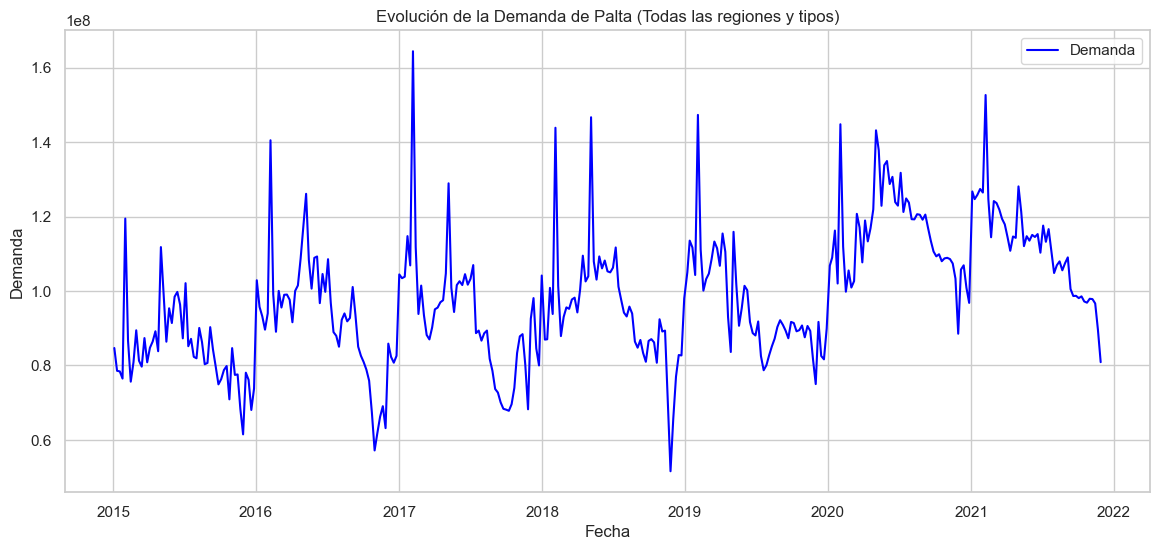

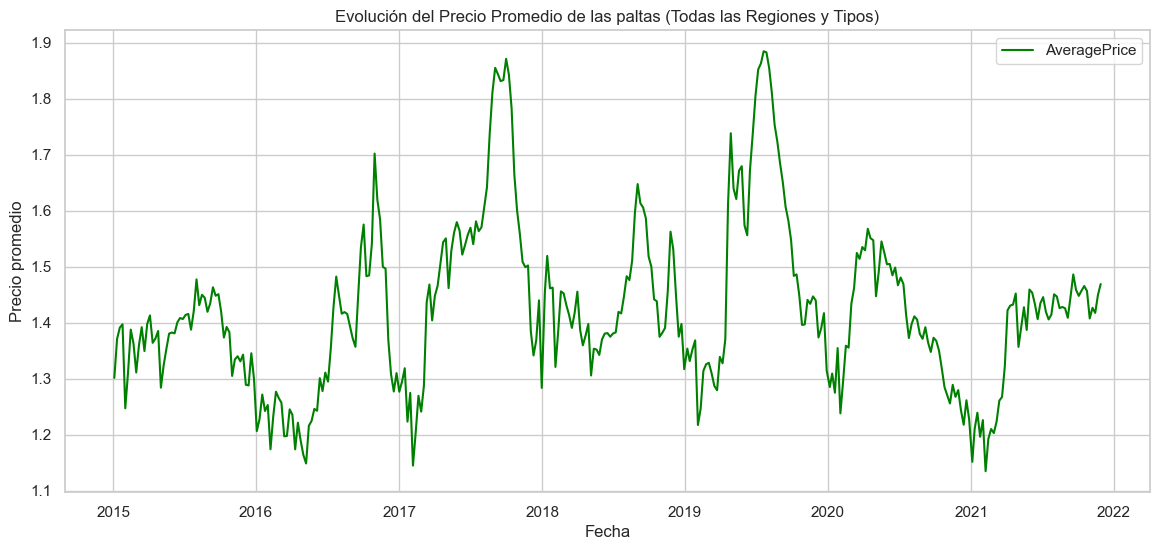

In [131]:
#Análisis Exploratorio de Datos (EDA)

#Evolución de la demanda y precio a lo largo del tiempo

import matplotlib.pyplot as plt
import seaborn as sns

#Configuración de estilo
sns.set(style='whitegrid')

#Agrupar datos por fecha para analizar tendencias generales
time_series = grouped_data.groupby('Date').agg({
    'TotalVolume':'sum',
    'AveragePrice':'mean'
}).reset_index()

#Graficar evolución de la cantidad demandada
plt.figure(figsize=(14,6))
sns.lineplot(data=time_series, x='Date', y='TotalVolume', label='Demanda', color='blue')
plt.title('Evolución de la Demanda de Palta (Todas las regiones y tipos)')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.show()

#Graficar la evolución del precio promedio
plt.figure(figsize=(14,6))
sns.lineplot(data=time_series, x='Date', y='AveragePrice', label='AveragePrice', color='green')
plt.title('Evolución del Precio Promedio de las paltas (Todas las Regiones y Tipos)')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio')
plt.legend()
plt.show()

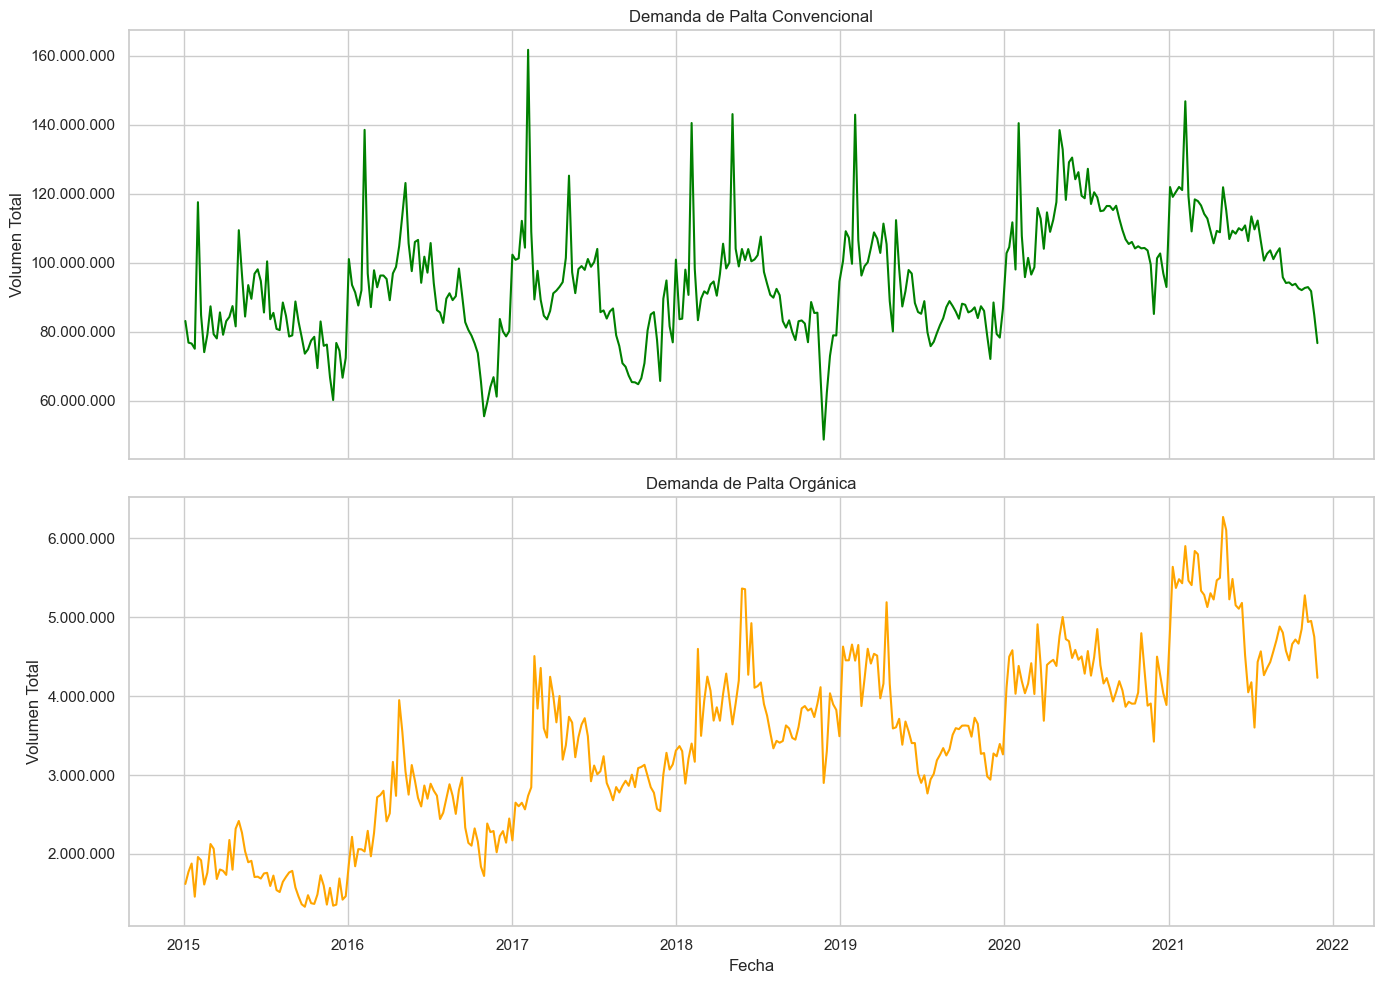

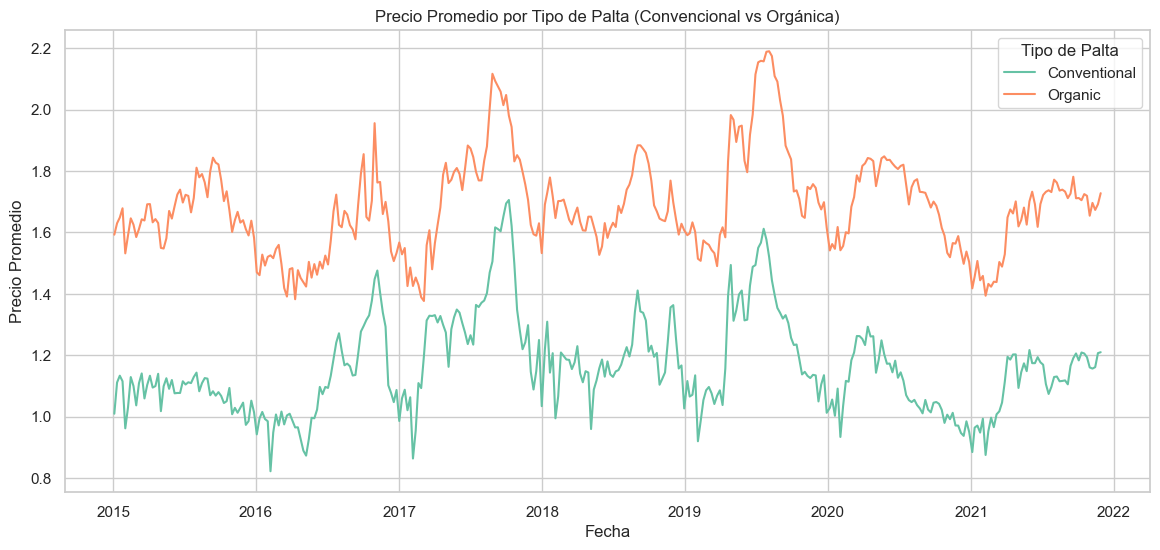

In [132]:
#Comparación entre tipos de paltas (convencional vs orgánica)

from matplotlib.ticker import FuncFormatter

#Agrupamos por tipo de palta
type_analysis = grouped_data.groupby(['type','Date']).agg({
    'TotalVolume':'sum',
    'AveragePrice':'mean'
}).reset_index()

#Separamos los datos por tipo de palta 

conv = type_analysis[type_analysis['type'] == 'Conventional']
org = type_analysis[type_analysis['type'] == 'Organic']

#Funcion para formatear números grandes sin abreviación
def plain_format(x, _):
    return f'{int(x):,}'.replace(',','.')

formatter = FuncFormatter(plain_format)

#Graficar en subplots
fig, axes = plt.subplots(2, 1, figsize=(14,10), sharex=True)

#Gráfico para paltas convencionales
sns.lineplot(data=conv, x='Date', y='TotalVolume', ax=axes[0], color='green')
axes[0].set_title('Demanda de Palta Convencional')
axes[0].set_ylabel('Volumen Total')
axes[0].yaxis.set_major_formatter(formatter)

#Gráfico para paltas orgánicas
sns.lineplot(data=org, x='Date', y='TotalVolume', ax=axes[1], color='orange')
axes[1].set_title('Demanda de Palta Orgánica')
axes[1].set_ylabel('Volumen Total')
axes[1].set_xlabel('Fecha')
axes[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

#Graficar precio promedio por tipo
plt.figure(figsize=(14,6))
sns.lineplot(data=type_analysis, x='Date', y='AveragePrice', hue='type', palette='Set2')
plt.title('Precio Promedio por Tipo de Palta (Convencional vs Orgánica)')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.legend(title='Tipo de Palta')
plt.show()

Correlación (Palta Convencional): -0.492
Correlación (Palta Orgánica): -0.109


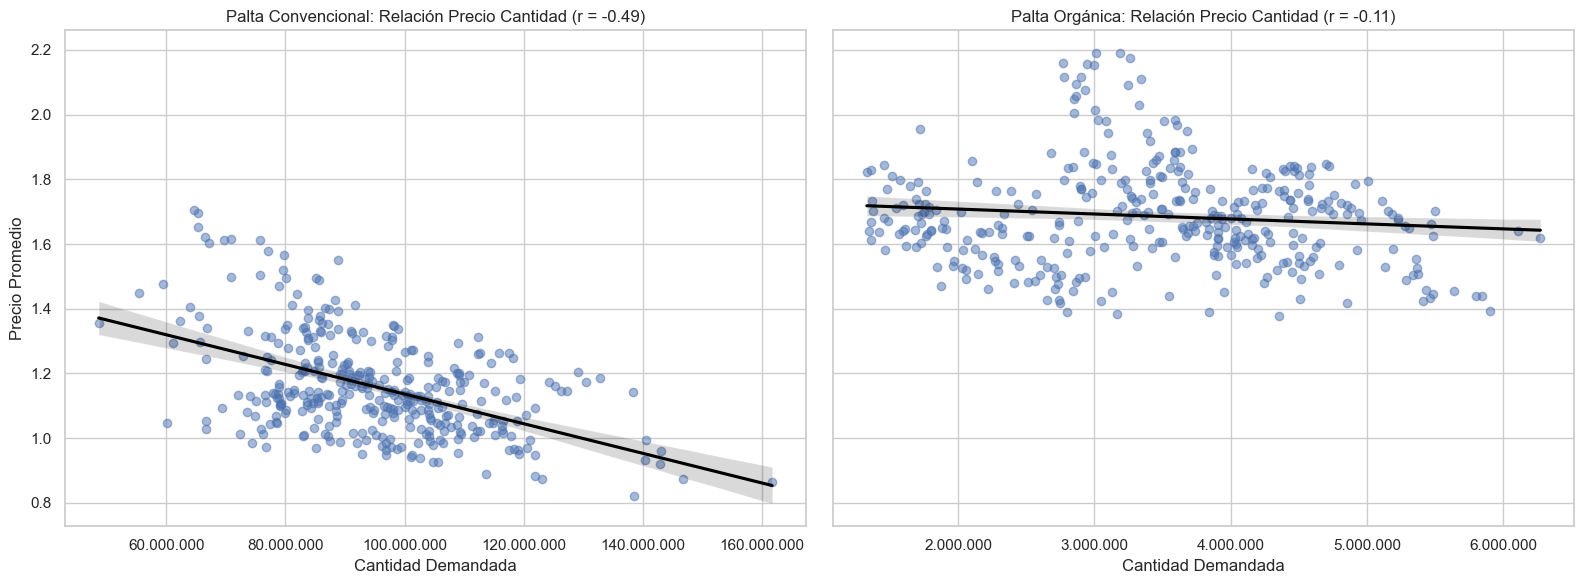

Se puede visualizar que la demanda de palta convencional posee un coeficiente de correlación de -0.492 (siendo esto la pendiente de la recta,
su inverso es la elasticidad precio de la demanda, -2.03), lo que señala que es un bien elástico, es decir, los consumidores reacciones fuertemente a
cambios en el precio.

En cuanto a la demanda de palta orgánica posee un coeficiente de correlación de -0.109, lo que señala que hay una relación muy débil entre el precio
de la palta orgánica y su demanda. Esto puede sugerir que la palta orgánica se mueve por otros determinantes (su regresión es casi horizontal).

Estos análisis sugieren lo siguiente: para la palta convencional, considerar el efecto estacional y el precio como variables relevantes para predecir
es adecuado.
Para la palta orgánica, puede que el precio sea un predictor débil, y el modelo deba enfocarse más en patrones temporales/estacionales


In [133]:
#Relación entre precio y cantidad (gráfico de dispersión)

# Calcular correlaciones
corr_conv = conv[['TotalVolume', 'AveragePrice']].corr().iloc[0,1]
corr_org = org[['TotalVolume', 'AveragePrice']].corr().iloc[0,1]

print(f"Correlación (Palta Convencional): {corr_conv:.3f}")
print(f"Correlación (Palta Orgánica): {corr_org:.3f}")

# Graficar scatterplots con la linea de tendencia
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# Scatterplot para palta convencional
sns.regplot(data=conv, x='TotalVolume', y='AveragePrice', ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
axes[0].set_title(f'Palta Convencional: Relación Precio Cantidad (r = {corr_conv:.2f})')
axes[0].set_xlabel('Cantidad Demandada')
axes[0].set_ylabel('Precio Promedio')
axes[0].xaxis.set_major_formatter(formatter)

# Scatterplot para palta orgánica
sns.regplot(data=org, x='TotalVolume', y='AveragePrice', ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
axes[1].set_title(f'Palta Orgánica: Relación Precio Cantidad (r = {corr_org:.2f})')
axes[1].set_xlabel('Cantidad Demandada')
axes[1].set_ylabel('')
axes[1].xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

print('Se puede visualizar que la demanda de palta convencional posee un coeficiente de correlación de -0.492 (siendo esto la pendiente de la recta,\n' 
      'su inverso es la elasticidad precio de la demanda, -2.03), lo que señala que es un bien elástico, es decir, los consumidores reacciones fuertemente a\n' 
      'cambios en el precio.\n')
print('En cuanto a la demanda de palta orgánica posee un coeficiente de correlación de -0.109, lo que señala que hay una relación muy débil entre el precio\n' 
        'de la palta orgánica y su demanda. Esto puede sugerir que la palta orgánica se mueve por otros determinantes (su regresión es casi horizontal).\n')

print('Estos análisis sugieren lo siguiente: para la palta convencional, considerar el efecto estacional y el precio como variables relevantes para predecir\n' 
        'es adecuado.')
print('Para la palta orgánica, puede que el precio sea un predictor débil, y el modelo deba enfocarse más en patrones temporales/estacionales')

<Figure size 1400x1000 with 0 Axes>

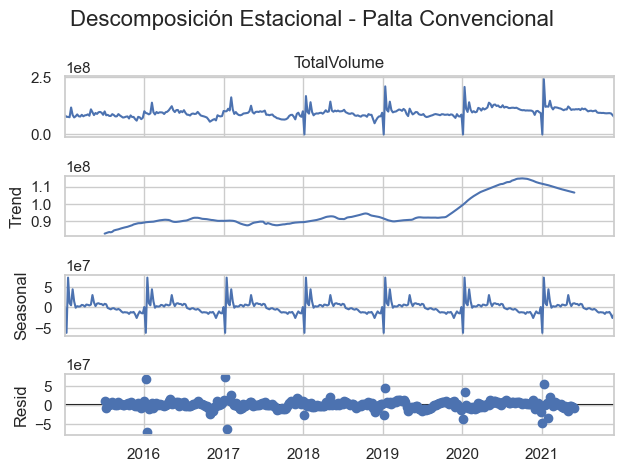

<Figure size 1400x1000 with 0 Axes>

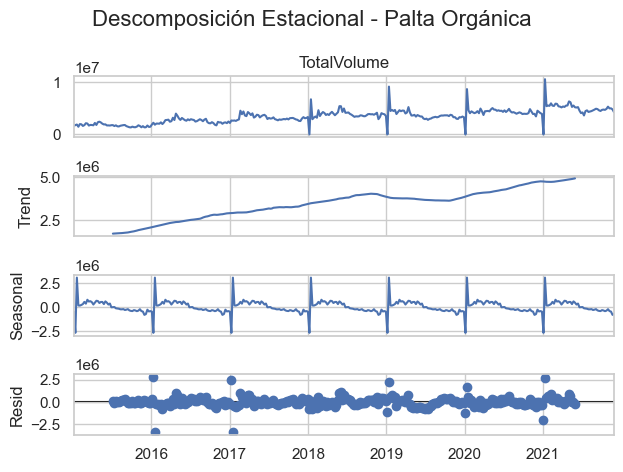


Con estos resultados, podemos evidenciar el comportamiento estacional como la naturaleza estacionaria de las variables de interés:

En cuanto a la Palta Convencional, vemos claramente un comportamiento estacional que se acentúa al inicio de cada año. A su vez, si bien tiene un
alza en su demanda en los últimos años, ésta se mantiene alrededor de su media en términos generales, lo que la hace una variable estacionaria.

En el caso de la Palta Orgánica, también observamos estacionalidad, pero esta vez existe una clara tendencia al alza (una demanda creciente a largo
plazo), lo que la hace no estacionaria.


In [134]:
# Descomposición estacional

from statsmodels.tsa.seasonal import seasonal_decompose

# Asegurar tipo datetime y orden cronológico
df4['Date'] = pd.to_datetime(df4['Date'])
df4 = df4.sort_values('Date')

# Filtrar solo palta convencional
df4_conv = df4[df4['type'] == 'Conventional']

# Agrupar por fecha (una observación por semana por tipo) y sumar volumen
weekly_data_conv = df4_conv.groupby('Date').agg({'TotalVolume': 'sum'})

# Ahora aseguramos frecuencia semanal constante (rellena semanas faltantes con 0)
weekly_data_conv = weekly_data_conv.resample('W').sum()

# Aplicar descomposición estacional (asumimos periodo de 52 semanas)
decomp_conv = seasonal_decompose(weekly_data_conv['TotalVolume'], model='additive', period=52)

# Graficar
plt.figure(figsize=(14, 10))
decomp_conv.plot()
plt.suptitle('Descomposición Estacional - Palta Convencional', fontsize=16)
plt.tight_layout()
plt.show()

# Filtrar solo palta orgánica
df4_org = df4[df4['type'] == 'Organic']

# Agrupar por fecha (una observación por semana por tipo) y sumar volumen
weekly_data_org = df4_org.groupby('Date').agg({'TotalVolume': 'sum'})

# Ahora aseguramos frecuencia semanal constante (rellena semanas faltantes con 0)
weekly_data_org = weekly_data_org.resample('W').sum()

# Aplicar descomposición estacional (asumimos periodo de 52 semanas)
decomp_org = seasonal_decompose(weekly_data_org['TotalVolume'], model='additive', period=52)

# Graficar
plt.figure(figsize=(14, 10))
decomp_org.plot()
plt.suptitle('Descomposición Estacional - Palta Orgánica', fontsize=16)
plt.tight_layout()
plt.show()

print('\nCon estos resultados, podemos evidenciar el comportamiento estacional como la naturaleza estacionaria de las variables de interés:')
print('\nEn cuanto a la Palta Convencional, vemos claramente un comportamiento estacional que se acentúa al inicio de cada año. A su vez, si bien tiene un\n' 
        'alza en su demanda en los últimos años, ésta se mantiene alrededor de su media en términos generales, lo que la hace una variable estacionaria.')
print('\nEn el caso de la Palta Orgánica, también observamos estacionalidad, pero esta vez existe una clara tendencia al alza (una demanda creciente a largo\n' 
        'plazo), lo que la hace no estacionaria.')

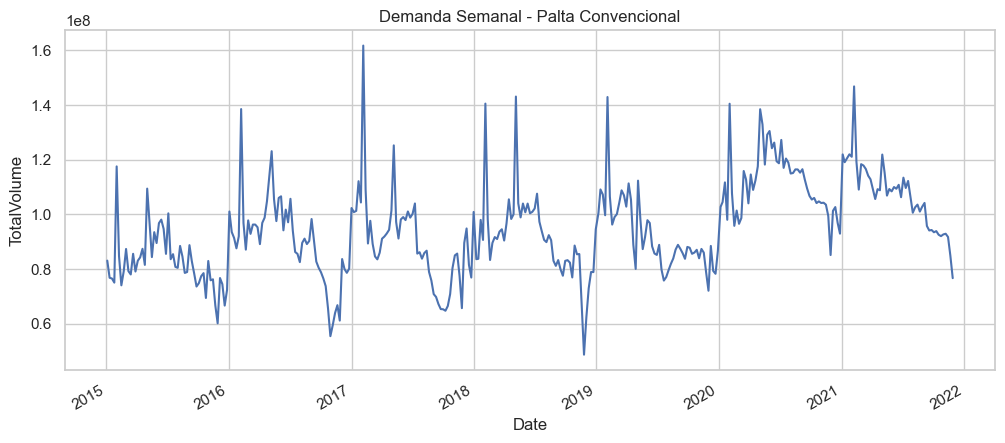

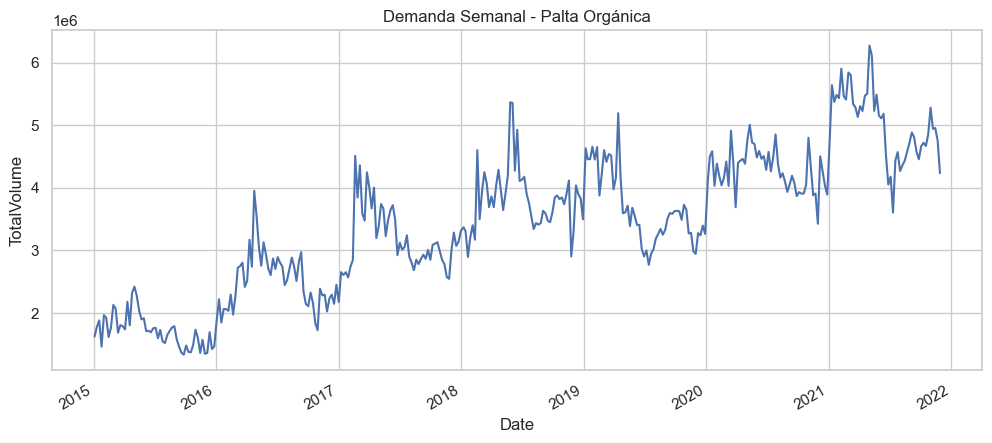

In [135]:
# Preparación de los datos para modelado de series temporales

# Asegurarnos de que las fechas están ordenadas
df4 = df4.sort_values('Date')

# Agregación semanal por tipo de palta (esto para mayor granularidad, mayor disponibilidad de datos para entrenar y comportamiento estacional)
weekly_data = df4.groupby(['Date','type']).agg({
    'TotalVolume':'sum',
    'AveragePrice': 'mean'
}).reset_index()

# Separar las series temporales por tipo
df4_conv = weekly_data[weekly_data['type'] == 'Conventional'].set_index('Date')
df4_org = weekly_data[weekly_data['type'] == 'Organic'].set_index('Date')

# Copia de la variable para aplicar los modelos
weekly_data_conv = df4_conv['TotalVolume'].copy()
weekly_data_org = df4_org['TotalVolume'].copy()

# Eliminar la columna de tipo al estar implícita
df4_conv = df4_conv.drop(columns='type')
df4_org = df4_org.drop(columns='type')

# Visualización rápida (comprobación)

df4_conv['TotalVolume'].plot(figsize=(12,5), title='Demanda Semanal - Palta Convencional')
plt.ylabel('TotalVolume')
plt.show()

df4_org['TotalVolume'].plot(figsize=(12,5), title='Demanda Semanal - Palta Orgánica')
plt.ylabel('TotalVolume')
plt.show()


In [136]:
# Separación set entrenamiento y set testeo

print('Definimos el set de entrenamiento como los primeros 6 años de historia (2015-2020), y al set de testeo el último año del dataset (2021)\n')

# Definir fecha de corte para separación de sets
cutoff_date = '2021-01-04'

conv_train = weekly_data_conv.loc[:cutoff_date]
conv_test = weekly_data_conv.loc[cutoff_date:]

org_train = weekly_data_org.loc[:cutoff_date]
org_test = weekly_data_org.loc[cutoff_date:]

# Verificación
print(f"Convencional - Train: {conv_train.index.min().date()} a {conv_train.index.max().date()}")
print(f"Convencional - Test:  {conv_test.index.min().date()} a {conv_test.index.max().date()}")
print(f"Orgánica     - Train: {org_train.index.min().date()} a {org_train.index.max().date()}")
print(f"Orgánica     - Test:  {org_test.index.min().date()} a {org_test.index.max().date()}")



Definimos el set de entrenamiento como los primeros 6 años de historia (2015-2020), y al set de testeo el último año del dataset (2021)

Convencional - Train: 2015-01-04 a 2021-01-04
Convencional - Test:  2021-01-04 a 2021-11-28
Orgánica     - Train: 2015-01-04 a 2021-01-04
Orgánica     - Test:  2021-01-04 a 2021-11-28


In [137]:
# Implementación modelos SARIMA para Palta Convencional

#Metodología Box Jenkins para determinar los parámetros del modelo SARIMA para Palta Convencional

#Test Dick Fuller para comprobar estacionariedad (ADF - Augmented Dickey Fuller) para Palta Convencional
from statsmodels.tsa.stattools import adfuller

#Aplicar test ADF sobre la demanda semanal
result_conv_series = adfuller(weekly_data_conv)

print('ADF Statistic:', result_conv_series[0])
print('p-value:', result_conv_series[1])
print('Lags usados', result_conv_series[2])
print('Número de observaciones:', result_conv_series[3])
print('Valores críticos:')
for key, value in result_conv_series[4].items():
    print(f'{key}: {value}')

print('\n La variable (cantidad demandada palta convencional) según el test ADF es estacionaria.\n')
print('Esto lo podemos comprobar porque:\n'
      'ADF Statistic =-3.3, lo que señala estar en zona de rechazo de Ho.\n' 
      'Lo mismo sucede con p-value= 0.013, es menor a 0.05, región de rechazo Ho.\n'
      'Dado que el test Dickey Fuller se basa en un test de hipótesis para determinar si una serie temporal tiene raíz unitaria, es decir, no estacionaria,\n' \
      'entonces al rechazar la hipotesis nula tenemos que nuestra variable es estacionaria.')
print('Esto permite aplicar un modelo SARIMA directamente sin tener que diferenciar')



ADF Statistic: -3.332304356128122
p-value: 0.013494792524279788
Lags usados 14
Número de observaciones: 346
Valores críticos:
1%: -3.4493918438232525
5%: -2.8699298018856574
10%: -2.5712397066390458

 La variable (cantidad demandada palta convencional) según el test ADF es estacionaria.

Esto lo podemos comprobar porque:
ADF Statistic =-3.3, lo que señala estar en zona de rechazo de Ho.
Lo mismo sucede con p-value= 0.013, es menor a 0.05, región de rechazo Ho.
Dado que el test Dickey Fuller se basa en un test de hipótesis para determinar si una serie temporal tiene raíz unitaria, es decir, no estacionaria,
entonces al rechazar la hipotesis nula tenemos que nuestra variable es estacionaria.
Esto permite aplicar un modelo SARIMA directamente sin tener que diferenciar


<Figure size 1200x500 with 0 Axes>

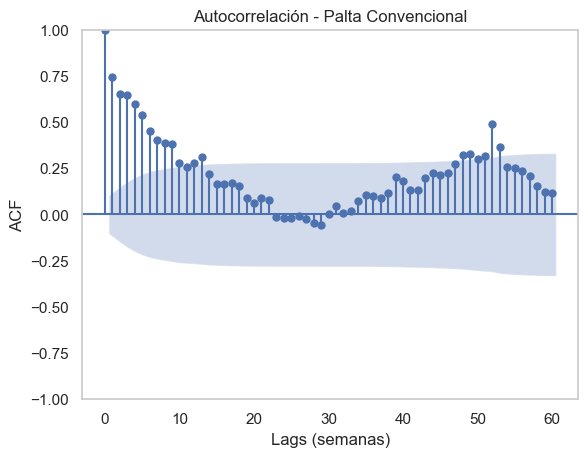


 Se puede observar que existen picks de estacionalidad principalmente en la semana 52, lo que indica estacionalidad anual.
Esta comprobación nos ayuda a definir el parámetro de estacionalidad "s" en nuestro modelo SARIMA


In [138]:
# Comprobación de estacionalidad (periodicidad) mediante gráfico de autocorrelación (ACF) para Palta Convencional
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Asegurarse de que la serie esté bien estructurada
weekly_data_conv = weekly_data[weekly_data['type'] == 'Conventional']['TotalVolume']

# Plot de autocorrelación hasta 60 semanas
plt.figure(figsize=(12,5))
plot_acf(weekly_data_conv, lags=60)
plt.title('Autocorrelación - Palta Convencional')
plt.xlabel('Lags (semanas)')
plt.ylabel('ACF')
plt.grid()
plt.show()

print('\n Se puede observar que existen picks de estacionalidad principalmente en la semana 52, lo que indica ' \
'estacionalidad anual.')
print('Esta comprobación nos ayuda a definir el parámetro de estacionalidad "s" en nuestro modelo SARIMA')

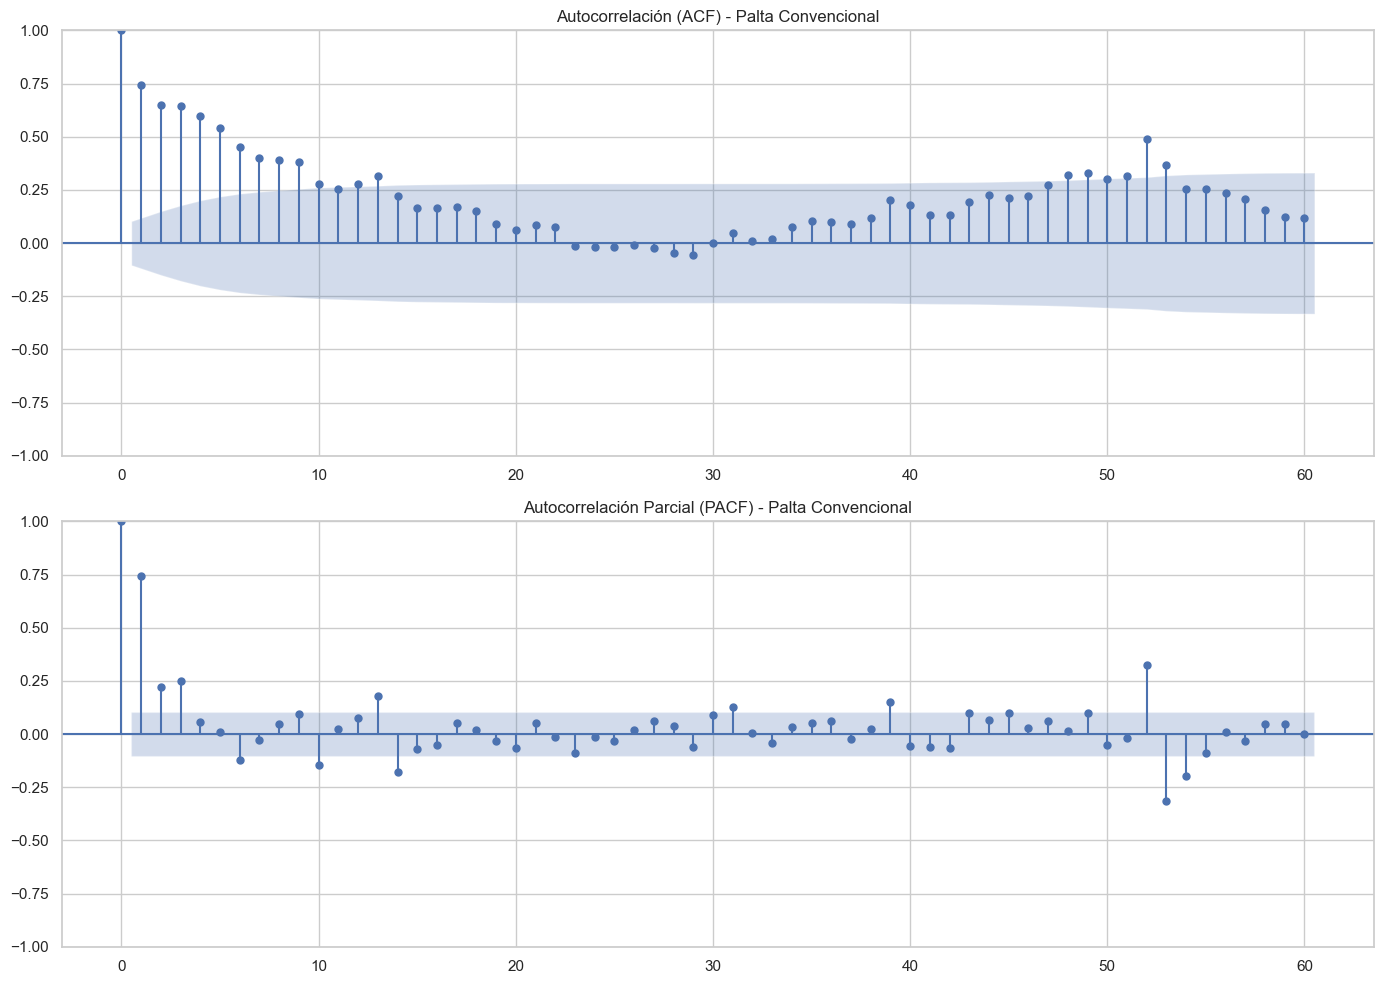


 Observando los gráficos de Autocorrelación, podemos definir con claridad los parámetros de nuestro modelo SARIMA:
Componente regular (no estacional): ACF -> primeros 10 rezagos son significativos, pero caen rápido,lo que es típico en una MA de grado bajo, por ende hacemos MA(1) o MA(2) -> q = 1 o 2PACF -> los primeros 2 rezagos son significativos, luego caen a cero, sugiriendo un modelo AR(2) -> p= 2
Componente Estacional: Ambos gráficos señalan picks en 52-53, indicando estacionalidad anual semanal. ACF significativa en rezagos 52-53 -> Componente estacional MA -> Q = 1. PACF significativa en rezagos 52-53 -> componente estacional AR -> P = 1
SARIMA(2,0,1)(1,1,1,52) -> no hace falta diferenciar al ser la variable estacionaria


In [139]:
# ACF y PACF (Autocorrelation)

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
fig, axes = plt.subplots(2,1, figsize=(14,10))

# Autocorrelación ACF
plot_acf(weekly_data_conv, lags=60, ax=axes[0])
axes[0].set_title('Autocorrelación (ACF) - Palta Convencional')

# Autocorrelación parcial (PACF)
plot_pacf(weekly_data_conv, lags=60, ax=axes[1], method='ywm')
axes[1].set_title('Autocorrelación Parcial (PACF) - Palta Convencional')

plt.tight_layout()
plt.show()

print('\n Observando los gráficos de Autocorrelación, podemos definir con claridad los parámetros de nuestro modelo SARIMA:')
print('Componente regular (no estacional): ACF -> primeros 10 rezagos son significativos, pero caen rápido,' \
'lo que es típico en una MA de grado bajo, por ende hacemos MA(1) o MA(2) -> q = 1 o 2' \
'PACF -> los primeros 2 rezagos son significativos, luego caen a cero, sugiriendo un modelo AR(2) -> p= 2')
print('Componente Estacional: Ambos gráficos señalan picks en 52-53, indicando estacionalidad anual semanal. ' \
'ACF significativa en rezagos 52-53 -> Componente estacional MA -> Q = 1. ' \
'PACF significativa en rezagos 52-53 -> componente estacional AR -> P = 1')
print('SARIMA(2,0,1)(1,1,1,52) -> no hace falta diferenciar al ser la variable estacionaria' )



c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
2015-01-04 00:00:00 2021-01-04 00:00:00
2021-01-04 00:00:00 2021-11-28 00:00:00


c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


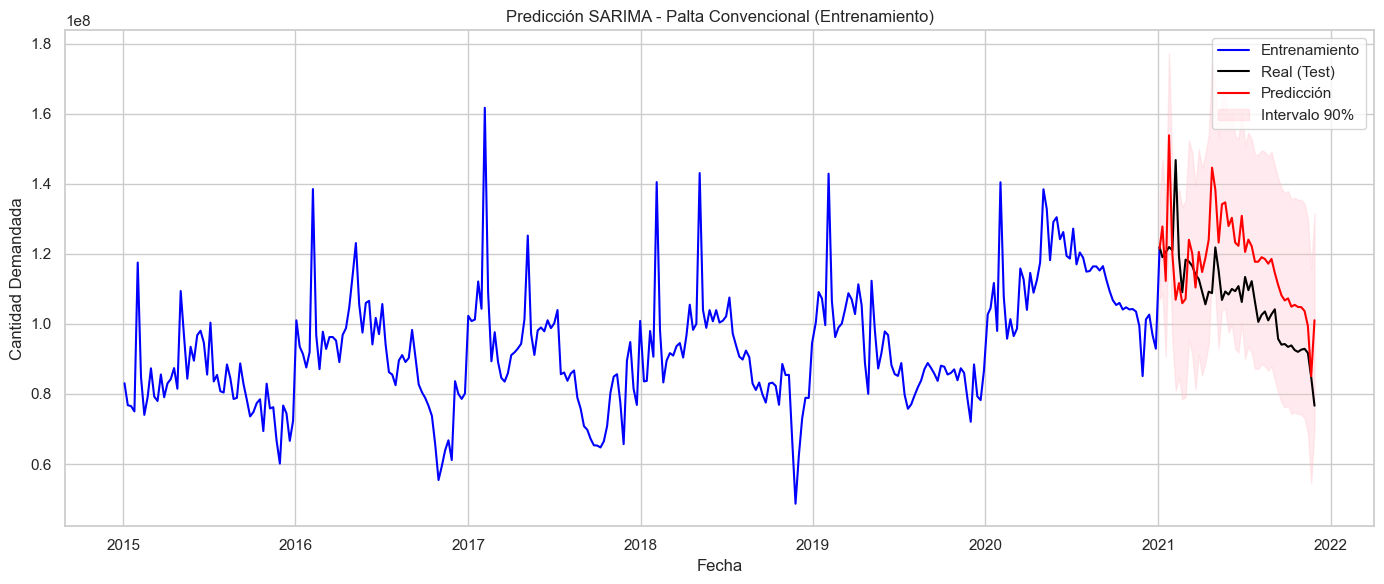

RMSE: 15994651.75
MAE: 13574314.01
MAPE: 12.79%


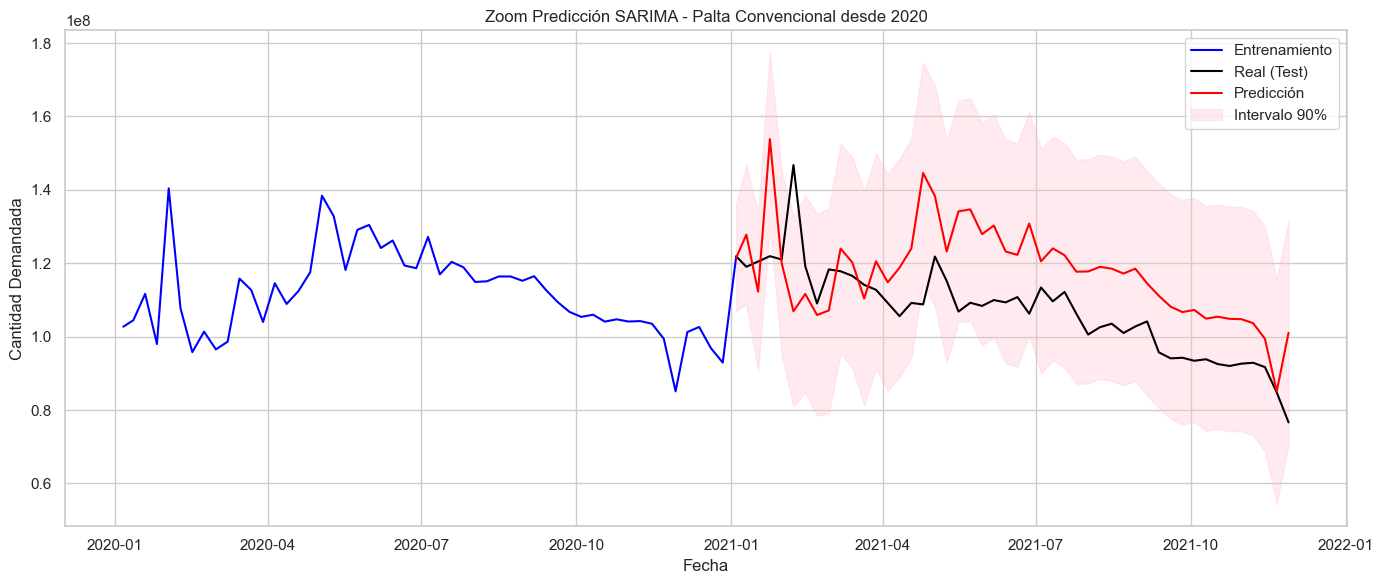


 El modelo SARIMA(2,0,1)(1,1,1,52) aplicado genera los siguientes resultados:

 RMSE: 15.994.651,75 -> Este estadístico mide la raíz cuadrada del promedio de los errores al cuadrado. Su interpretación es que la predicción se desvía del valor real en torno a 16 millones de unidades de volumen. Considerando que el volumen promedio son 100 millones de unidades, puede ser un valor aceptable.

 MAE: 13.574.314,01 -> Este estadístico es el promedio de las diferencias absolutas entre los valores predichos y reales. Señala que en promedio el modelo se equivoca por unos 13,5 millones de unidades semanales (a nivel global).

 MAPE: 12,79% -> es el porcentaje promedio de error entre la predicción y el valor real. Señala que en promedio las predicciones del modelo se desvían un 12,79% respecto al valor real, lo cual puede ser razonable para series temporales comerciales con estacionalidad y ruido.


In [140]:
# Implementación SARIMA set entrenamiento y set de testeo - Palta Convencional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ajustar modelo SARIMA
model = SARIMAX(conv_train,
                order=(2,0,1),
                seasonal_order=(1,1,1,52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

print(type(conv_train.index))  # Debe ser <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
print(conv_train.index.min(), conv_train.index.max())
print(conv_test.index.min(), conv_test.index.max())

assert conv_train.index.is_monotonic_increasing
assert conv_test.index.is_monotonic_increasing
assert isinstance(conv_train.index, pd.DatetimeIndex)

start_idx = len(conv_train)
end_idx = start_idx + len(conv_test) - 1

forecast = results.get_prediction(start=start_idx, end=end_idx, dynamic=False)

# Reasignar el índice correcto a las predicciones
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.1) # 90% intervalo de predicción
pred_mean.index = conv_test.index
conf_int.index = conv_test.index

# Graficar
plt.figure(figsize=(14,6))
plt.plot(conv_train.index, conv_train, label='Entrenamiento', color='blue')
plt.plot(conv_test.index, conv_test, label='Real (Test)', color='black')
plt.plot(pred_mean.index, pred_mean, label='Predicción', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalo 90%')
plt.title('Predicción SARIMA - Palta Convencional (Entrenamiento)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()

# Serie real y predicha en el test
y_true = conv_test
y_pred = pred_mean

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE
mae = mean_absolute_error(y_true, y_pred)

# MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Mostrar resultados
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

# Definir fecha de inicio del zoom
start_zoom = '2020-01-01'

# Filtrar cada serie desde esa fecha
train_zoom = conv_train[conv_train.index >= start_zoom]
test_zoom = conv_test[conv_test.index >= start_zoom]
pred_zoom = pred_mean[pred_mean.index >= start_zoom]
conf_int_zoom = conf_int[conf_int.index >= start_zoom]

# Graficar con zoom desde 2020
plt.figure(figsize=(14,6))
plt.plot(train_zoom.index, train_zoom, label='Entrenamiento', color='blue')
plt.plot(test_zoom.index, test_zoom, label='Real (Test)', color='black')
plt.plot(pred_zoom.index, pred_zoom, label='Predicción', color='red')
plt.fill_between(conf_int_zoom.index,
                 conf_int_zoom.iloc[:, 0],
                 conf_int_zoom.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalo 90%')
plt.title('Zoom Predicción SARIMA - Palta Convencional desde 2020')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()

print('\n El modelo SARIMA(2,0,1)(1,1,1,52) aplicado genera los siguientes resultados:')
print('\n RMSE: 15.994.651,75 -> Este estadístico mide la raíz cuadrada del promedio de los errores al cuadrado. ' \
'Su interpretación es que la predicción se desvía del valor real en torno a 16 millones de unidades ' \
'de volumen. Considerando que el volumen promedio son 100 millones de unidades, puede ser un valor aceptable.')
print('\n MAE: 13.574.314,01 -> Este estadístico es el promedio de las diferencias absolutas entre los valores ' \
'predichos y reales. Señala que en promedio el modelo se equivoca por unos 13,5 millones de unidades semanales (' \
'a nivel global).')
print('\n MAPE: 12,79% -> es el porcentaje promedio de error entre la predicción y el valor real. ' \
'Señala que en promedio las predicciones del modelo se desvían un 12,79% respecto al valor real, lo cual ' \
'puede ser razonable para series temporales comerciales con estacionalidad y ruido.')

In [141]:
# Código para depurar futuros errores con SARIMAX para ambos tipos de palta (Convencional y Orgánica)

# Palta Convencional

# Reiniciar índice (por si Date estaba como índice)
df4 = df4.reset_index()

# Asegurar que 'Date' sea tipo datetime
df4['Date'] = pd.to_datetime(df4['Date'])

# Agrupar por fecha y sumar los volúmenes (en caso de duplicados por región o tamaño)
weekly_data_conv = df4.groupby('Date')['TotalVolume'].sum()

# Ordenar por fecha
weekly_data_conv = weekly_data_conv.sort_index()

# Establecer frecuencia semanal explícita (rellena semanas faltantes con NaN)
weekly_data_conv = weekly_data_conv.asfreq('W')

# Eliminar semanas sin datos (por si faltan)
weekly_data_conv = weekly_data_conv.dropna()

# Verificaciones
print(type(weekly_data_conv.index))            # Esperado: DatetimeIndex
print(weekly_data_conv.index.min())            # 2015-01-04
print(weekly_data_conv.index.max())            # 2021-11-28
print(weekly_data_conv.index.freq)             # W-SUN
print(weekly_data_conv.head())

# Palta Orgánica

# Asegurar que 'Date' esté en formato datetime y depurar índice

# Paso 1: Reiniciar índice (por si Date estaba como índice)
df4 = df4.reset_index()

# Paso 2: Asegurar que 'Date' sea tipo datetime
df4['Date'] = pd.to_datetime(df4['Date'])

# Paso 3: Agrupar por fecha (suma total en cada semana, sin importar regiones ni tamaños)
weekly_data_org = df4.groupby('Date')['TotalVolume'].sum()

# Paso 4: Ordenar por fecha
weekly_data_org = weekly_data_org.sort_index()

# Paso 5: Establecer frecuencia semanal explícita
weekly_data_org = weekly_data_org.asfreq('W')

# Paso 6: Eliminar semanas sin datos (rellena huecos si los hay)
weekly_data_org = weekly_data_org.dropna()

# Paso 7: Verificaciones
print(type(weekly_data_org.index))            # Esperado: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
print(weekly_data_org.index.min())            # Esperado: 2015-01-04 o fecha inicial real
print(weekly_data_org.index.max())            # Esperado: 2021-11-28 o fecha final real
print(weekly_data_org.index.freq)             # Esperado: W-SUN
print(weekly_data_org.head())                 # Muestra las primeras filas

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
2015-01-04 00:00:00
2021-11-28 00:00:00
None
Date
2015-01-04    8.467434e+07
2015-01-11    7.855581e+07
2015-01-18    7.838878e+07
2015-01-25    7.646628e+07
2015-02-01    1.194532e+08
Name: TotalVolume, dtype: float64
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
2015-01-04 00:00:00
2021-11-28 00:00:00
None
Date
2015-01-04    8.467434e+07
2015-01-11    7.855581e+07
2015-01-18    7.838878e+07
2015-01-25    7.646628e+07
2015-02-01    1.194532e+08
Name: TotalVolume, dtype: float64


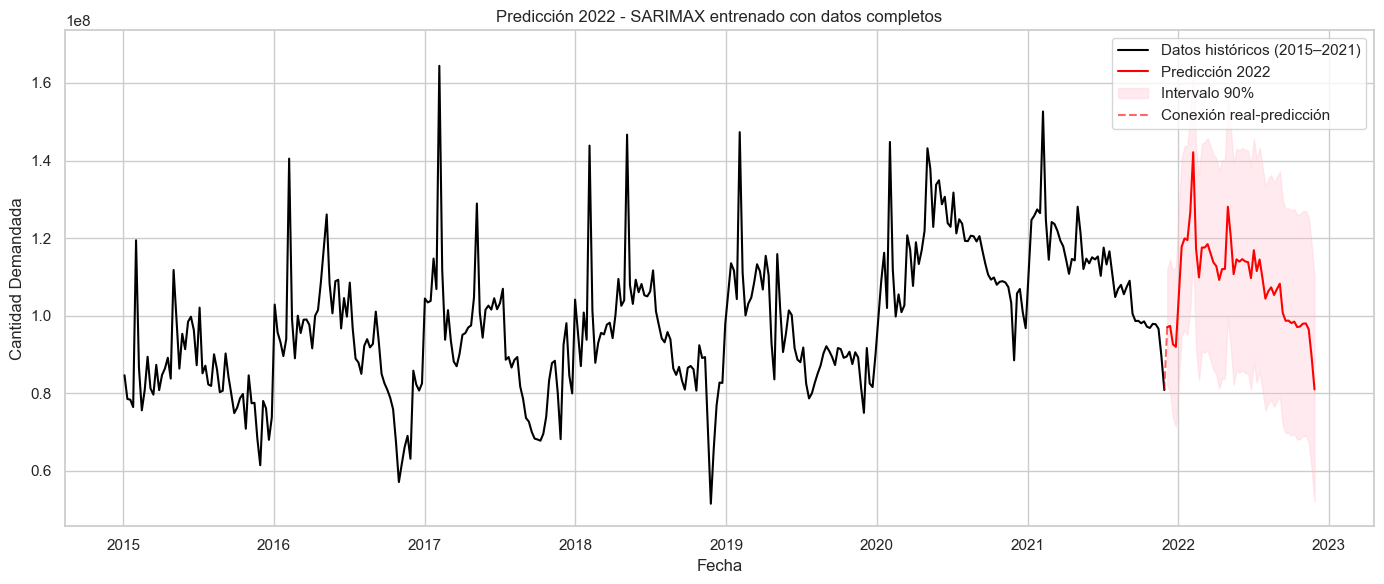

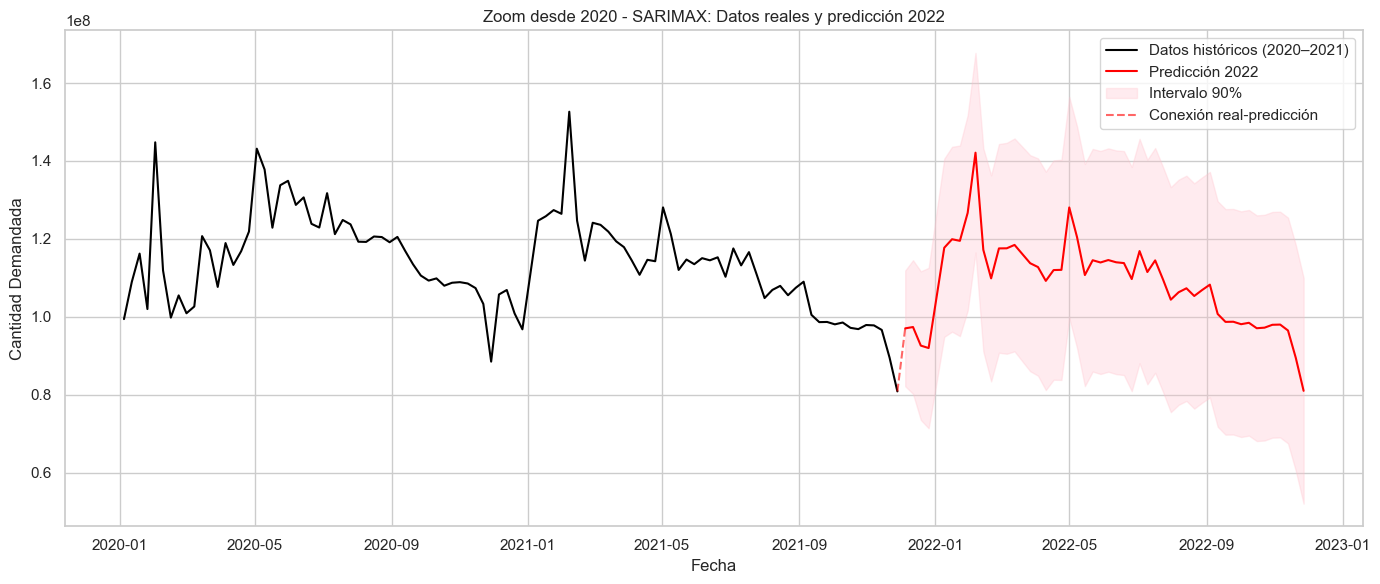

In [142]:
# Entrenamiento del modelo SARIMAX con el 100% de datos históricos (predicción 2022)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asegurarse que el índice sea datetime y tenga frecuencia semanal
weekly_data_conv = weekly_data_conv.copy()
weekly_data_conv.index = pd.to_datetime(weekly_data_conv.index)
weekly_data_conv = weekly_data_conv.sort_index()
weekly_data_conv = weekly_data_conv.asfreq('W') 
weekly_data_conv = weekly_data_conv.interpolate(method='linear')

# Confirmar que estamos trabajando con la serie de volumen
full_series = weekly_data_conv

# Entrenar modelo SARIMAX con todos los datos disponibles (hasta 2021)
model = SARIMAX(full_series,
                order=(2, 0, 1),
                seasonal_order=(1, 1, 1, 52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Crear fechas futuras para el año 2022 (52 semanas desde la última fecha)
last_date = full_series.index[-1]
future_index = pd.date_range(start=last_date + pd.Timedelta(weeks=1),
                             periods=52,
                             freq='W')

# Realizar predicción
forecast = results.get_forecast(steps=52)
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.1)  # 90% intervalo de confianza

# Reasignar el índice correcto a la predicción
pred_mean.index = future_index
conf_int.index = future_index

# Graficar
plt.figure(figsize=(14,6))
plt.plot(full_series.index, full_series, label='Datos históricos (2015–2021)', color='black')
plt.plot(pred_mean.index, pred_mean, label='Predicción 2022', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalo 90%')
# Línea de conexión visual entre el último dato real y el primer valor predicho
plt.plot([full_series.index[-1], pred_mean.index[0]],
         [full_series.iloc[-1], pred_mean.iloc[0]],
         color='red', linestyle='--', alpha=0.6, label='Conexión real-predicción')
plt.title('Predicción 2022 - SARIMAX entrenado con datos completos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()

# Graficar zoom desde 2020 en adelante
plt.figure(figsize=(14,6))

# Filtrar datos reales desde 2020
real_zoom = full_series[full_series.index >= '2020-01-01']

# Graficar datos reales desde 2020
plt.plot(real_zoom.index, real_zoom, label='Datos históricos (2020–2021)', color='black')

# Graficar predicción para 2022
plt.plot(pred_mean.index, pred_mean, label='Predicción 2022', color='red')

# Intervalo de confianza
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalo 90%')

# Línea de conexión entre 2021 y 2022
plt.plot([full_series.index[-1], pred_mean.index[0]],
         [full_series.iloc[-1], pred_mean.iloc[0]],
         color='red', linestyle='--', alpha=0.6, label='Conexión real-predicción')

# Etiquetas y leyenda
plt.title('Zoom desde 2020 - SARIMAX: Datos reales y predicción 2022')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()

In [143]:
# Crear DataFrame con la predicción de 2022 Palta Convencional
forecast_df4_palta_convencional = pd.DataFrame({
    'Fecha': pred_mean.index,
    'Prediccion_TotalVolume': pred_mean.values,
    'Lower_CI_90%': conf_int.iloc[:,0].values,
    'Upper_CI_90%': conf_int.iloc[:,1].values
})

# Establecer la columna de fecha como índice
forecast_df4_palta_convencional.set_index('Fecha', inplace=True)

# Mostrar forecasting palta convencional 2022
print(forecast_df4_palta_convencional)



            Prediccion_TotalVolume  Lower_CI_90%  Upper_CI_90%
Fecha                                                         
2021-12-05            9.705075e+07  8.220724e+07  1.118943e+08
2021-12-12            9.739182e+07  8.024554e+07  1.145381e+08
2021-12-19            9.262379e+07  7.356170e+07  1.116859e+08
2021-12-26            9.199990e+07  7.141663e+07  1.125832e+08
2022-01-02            1.048413e+08  8.301564e+07  1.266669e+08
2022-01-09            1.177356e+08  9.488012e+07  1.405911e+08
2022-01-16            1.199232e+08  9.620477e+07  1.436416e+08
2022-01-23            1.195094e+08  9.506221e+07  1.439566e+08
2022-01-30            1.267065e+08  1.016401e+08  1.517729e+08
2022-02-06            1.421296e+08  1.165347e+08  1.677245e+08
2022-02-13            1.171992e+08  9.115148e+07  1.432470e+08
2022-02-20            1.098788e+08  8.344190e+07  1.363157e+08
2022-02-27            1.175700e+08  9.079780e+07  1.443422e+08
2022-03-06            1.175954e+08  9.053381e+07  1.446

In [144]:
# Exportación forecasting Palta Convencional a csv

#Ajustar las predicciones
forecast_df4_palta_convencional['TotalVolume'] = forecast_df4_palta_convencional['Prediccion_TotalVolume']

#Crear nuevo dataframe solo con fecha y totalvolume
export_df4 = forecast_df4_palta_convencional[['TotalVolume','Lower_CI_90%','Upper_CI_90%']].copy()
export_df4.index.name = 'Date'

#Exportar a csv
export_df4.to_csv('predicción_2022_palta_convencional.csv')

#Confirmar
print('Archivo CSV exportado exitosamente con las predicciones')

Archivo CSV exportado exitosamente con las predicciones


In [145]:
#Metodología Box Jenkins para determinar los parámetros del modelo SARIMA para Palta Orgánica

#Test Dick Fuller para comprobar estacionariedad (ADF - Augmented Dickey Fuller) para Palta Orgánica
from statsmodels.tsa.stattools import adfuller

#Aplicar test ADF sobre la demanda semanal
result_org_series = adfuller(weekly_data_org)

print('ADF Statistic:', result_org_series[0])
print('p-value:', result_org_series[1])
print('Lags usados', result_org_series[2])
print('Número de observaciones:', result_org_series[3])
print('Valores críticos:')
for key, value in result_org_series[4].items():
    print(f'{key}: {value}')

print('\n La variable al ser no estacionaria, aplicamos diferenciación\n')


ADF Statistic: -3.4271932294440512
p-value: 0.010066057828399486
Lags usados 14
Número de observaciones: 342
Valores críticos:
1%: -3.4496162602188187
5%: -2.870028369720798
10%: -2.5712922615505627

 La variable al ser no estacionaria, aplicamos diferenciación



<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


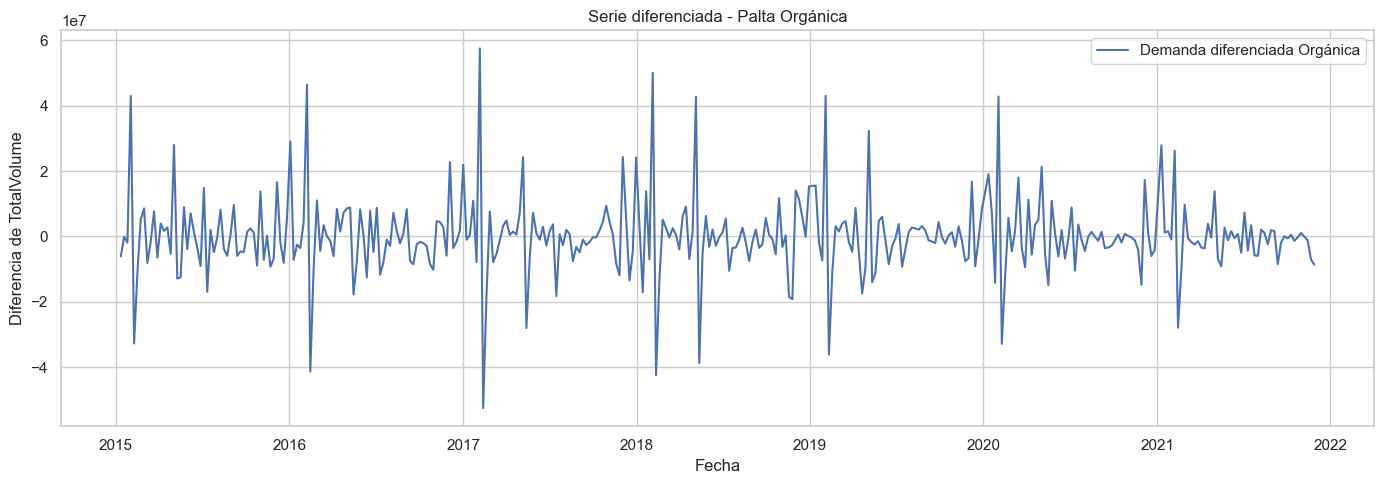

ADF Statistic (diferenciada): -5.998571786495038
p-value: 1.6785190063573644e-07
Lags usados 12
Valores críticos:
1%: -3.449559661646851
5%: -2.8700035112469626
10%: -2.5712790073013796

 Nota: el aumento del "ruido" en la serie diferenciada (esos picks exagerados en el gráfico) no corresponden a ruido aleatorio, mas bien son variaciones reales de la demanda entre semanas, lo que es esperable en series con estacionalidad. Esto no afecta a la implementación del modelo SARIMA.

 SARIMA modela la estructura de la serie original, no la serie diferenciada. Esto lo hace ajustando los parámetros para revertir esa transformación internamente (integra la serie)


In [146]:
# Serie diferenciada para palta orgánica

# Asegurarse de que el índice sea datetime
weekly_data_org = weekly_data_org.copy()
weekly_data_org.index = pd.to_datetime(weekly_data_org.index)
weekly_data_org = weekly_data_org.sort_index()

# Diferenciación simple 
org_diff = weekly_data_org.diff().dropna()

#Verificación 
print(type(org_diff.index))

#Visualizar la serie diferenciada
plt.figure(figsize=(14,5))
plt.plot(org_diff, label='Demanda diferenciada Orgánica')
plt.title('Serie diferenciada - Palta Orgánica')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de TotalVolume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#Comprobar estacionariedad nuevamente con variable diferenciada
result_diff = adfuller(org_diff)

print('ADF Statistic (diferenciada):', result_diff[0])
print('p-value:', result_diff[1])
print('Lags usados', result_diff[2])
print('Valores críticos:')
for key, value in result_diff[4].items():
    print(f'{key}: {value}')

print('\n Nota: el aumento del "ruido" en la serie diferenciada (esos picks exagerados en el gráfico) no corresponden ' \
'a ruido aleatorio, mas bien son variaciones reales de la demanda entre semanas, lo que es esperable en series con ' \
'estacionalidad. Esto no afecta a la implementación del modelo SARIMA.')
print('\n SARIMA modela la estructura de la serie original, no la serie diferenciada. Esto lo hace ajustando los ' \
'parámetros para revertir esa transformación internamente (integra la serie)')

<Figure size 1200x500 with 0 Axes>

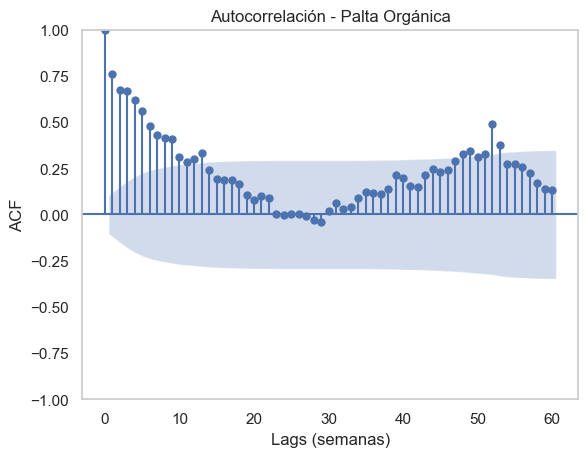


 Se puede observar que existen picks de estacionalidad principalmente en la semana 52, lo que indica estacionalidad anual.
Esta comprobación nos ayuda a definir el parámetro de estacionalidad "s" en nuestro modelo SARIMA


In [147]:
# Comprobación de estacionalidad (periodicidad) mediante gráfico de autocorrelación (ACF) para Palta Orgánica
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Asegurarse de que la serie esté bien estructurada
weekly_data_org = weekly_data[weekly_data['type'] == 'Organic']['TotalVolume']

# Palta Orgánica (no diferenciada)
plt.figure(figsize=(12,5))
plot_acf(weekly_data_conv, lags=60)
plt.title('Autocorrelación - Palta Orgánica')
plt.xlabel('Lags (semanas)')
plt.ylabel('ACF')
plt.grid()
plt.show()

print('\n Se puede observar que existen picks de estacionalidad principalmente en la semana 52, lo que indica ' \
'estacionalidad anual.')
print('Esta comprobación nos ayuda a definir el parámetro de estacionalidad "s" en nuestro modelo SARIMA')

<Figure size 1400x400 with 0 Axes>

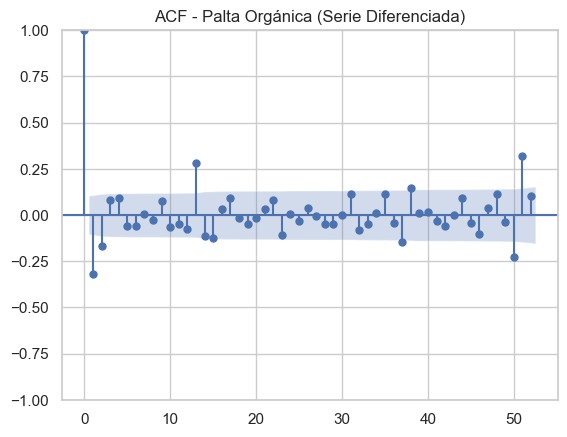

<Figure size 1400x400 with 0 Axes>

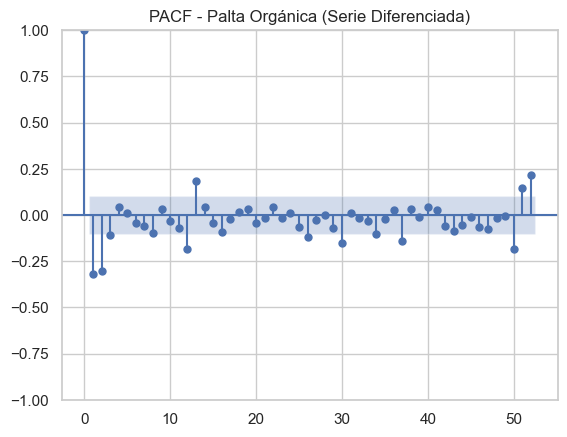


 Observando los gráficos de Autocorrelación, podemos definir con claridad los parámetros de nuestro modelo SARIMA:
Componente regular (no estacional): ACF -> primeros 3 rezagos son significativos, pero caen rápido,lo que es típico en una MA de grado bajo, por ende hacemos MA(2) -> q = 2PACF -> los primeros 3 rezagos son significativos, luego caen a cero, sugiriendo un modelo AR(2) -> p= 2
Componente Estacional: Ambos gráficos señalan picks en 52-53, indicando estacionalidad anual semanal. ACF significativa en rezagos 52-53 -> Componente estacional MA -> Q = 2. PACF significativa en rezagos 52-53 -> componente estacional AR -> P = 2
SARIMA(2,1,2)(2,1,2,52) -> siendo el 1 la diferenciación de la variable.


In [148]:
# Comprobación de estacionalidad (periodicidad) mediante gráfico de autocorrelación (ACF) para Palta Orgánica 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Establecer número de lags a mostrar
lags = 52

# Gráfico ACF (para determinar q)
plt.figure(figsize=(14,4))
plot_acf(org_diff, lags=lags, alpha=0.05)
plt.title('ACF - Palta Orgánica (Serie Diferenciada)')
plt.grid(True)
plt.show()

# Gráfico PACF (para determinar p)
plt.figure(figsize=(14,4))
plot_pacf(org_diff, lags=lags, alpha=0.05, method='ywm')
plt.title('PACF - Palta Orgánica (Serie Diferenciada)')
plt.grid(True)
plt.show()

print('\n Observando los gráficos de Autocorrelación, podemos definir con claridad los parámetros de nuestro modelo SARIMA:')
print('Componente regular (no estacional): ACF -> primeros 3 rezagos son significativos, pero caen rápido,' \
'lo que es típico en una MA de grado bajo, por ende hacemos MA(2) -> q = 2' \
'PACF -> los primeros 3 rezagos son significativos, luego caen a cero, sugiriendo un modelo AR(2) -> p= 2')
print('Componente Estacional: Ambos gráficos señalan picks en 52-53, indicando estacionalidad anual semanal. ' \
'ACF significativa en rezagos 52-53 -> Componente estacional MA -> Q = 2. ' \
'PACF significativa en rezagos 52-53 -> componente estacional AR -> P = 2')
print('SARIMA(2,1,2)(2,1,2,52) -> siendo el 1 la diferenciación de la variable.' )

c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
2015-01-04 00:00:00 2021-01-04 00:00:00
2021-01-04 00:00:00 2021-11-28 00:00:00


c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\esteb\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


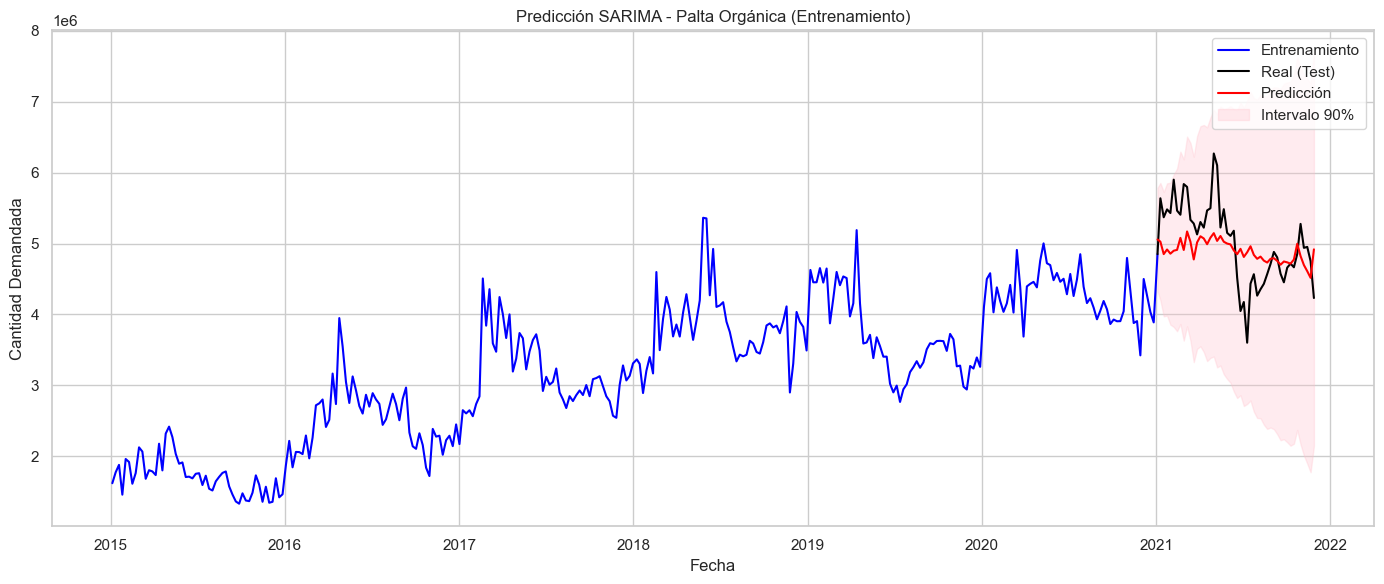

RMSE: 510804.53
MAE: 410862.70
MAPE: 8.26%


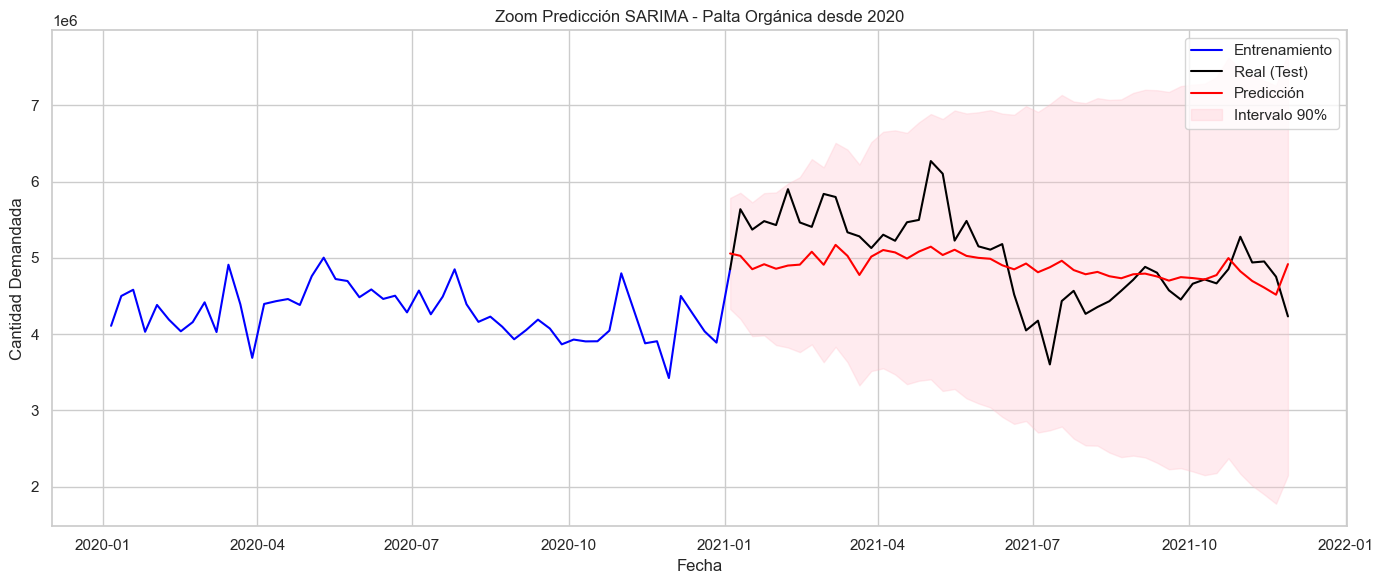


 Reflexión sobre esta implementación: al usar los parámetros definidos por ACF-PACF (Box Jenkins),tenemos buenos resultados, pero no óptimos. Si bien los indicadores de desviación son aceptables, estos se pueden minimizar aún más. Además, lo que genera más preocupación es la suavización excesiva de este SARIMA respecto a los datos reales de 2021. No logra capturar el comportamiento "brusco" de los datos originales. Es por ello, quese intentará aplicar el modelo Prophet para este caso.


In [149]:
# Implementación SARIMA set entrenamiento y set de testeo - Palta Orgánica

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ajustar modelo SARIMA para palta orgánica
model = SARIMAX(org_train,
                order=(2,1,2),
                seasonal_order=(2,1,2,52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Verificaciones de índice
print(type(org_train.index))  # Esperado: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
print(org_train.index.min(), org_train.index.max())
print(org_test.index.min(), org_test.index.max())

assert org_train.index.is_monotonic_increasing
assert org_test.index.is_monotonic_increasing
assert isinstance(org_train.index, pd.DatetimeIndex)

# Definir inicio y fin de predicción
start_idx = len(org_train)
end_idx = start_idx + len(org_test) - 1

# Generar predicciones para el set de testeo
forecast = results.get_prediction(start=start_idx, end=end_idx, dynamic=False)

# Reasignar el índice correcto a las predicciones
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.1)  # 90% intervalo de confianza
pred_mean.index = org_test.index
conf_int.index = org_test.index

# Gráfico general
plt.figure(figsize=(14,6))
plt.plot(org_train.index, org_train, label='Entrenamiento', color='blue')
plt.plot(org_test.index, org_test, label='Real (Test)', color='black')
plt.plot(pred_mean.index, pred_mean, label='Predicción', color='red')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalo 90%')
plt.title('Predicción SARIMA - Palta Orgánica (Entrenamiento)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluación de desempeño
y_true = org_test
y_pred = pred_mean

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')

# Zoom desde 2020
start_zoom = '2020-01-01'
train_zoom = org_train[org_train.index >= start_zoom]
test_zoom = org_test[org_test.index >= start_zoom]
pred_zoom = pred_mean[pred_mean.index >= start_zoom]
conf_int_zoom = conf_int[conf_int.index >= start_zoom]

plt.figure(figsize=(14,6))
plt.plot(train_zoom.index, train_zoom, label='Entrenamiento', color='blue')
plt.plot(test_zoom.index, test_zoom, label='Real (Test)', color='black')
plt.plot(pred_zoom.index, pred_zoom, label='Predicción', color='red')
plt.fill_between(conf_int_zoom.index,
                 conf_int_zoom.iloc[:, 0],
                 conf_int_zoom.iloc[:, 1],
                 color='pink', alpha=0.3, label='Intervalo 90%')
plt.title('Zoom Predicción SARIMA - Palta Orgánica desde 2020')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()

print('\n Reflexión sobre esta implementación: al usar los parámetros definidos por ACF-PACF (Box Jenkins),' \
'tenemos buenos resultados, pero no óptimos. Si bien los indicadores de desviación son aceptables, estos se ' \
'pueden minimizar aún más. Además, lo que genera más preocupación es la suavización excesiva de este SARIMA respecto ' \
'a los datos reales de 2021. No logra capturar el comportamiento "brusco" de los datos originales. Es por ello, que' \
'se intentará aplicar el modelo Prophet para este caso.')

22:33:52 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] done processing


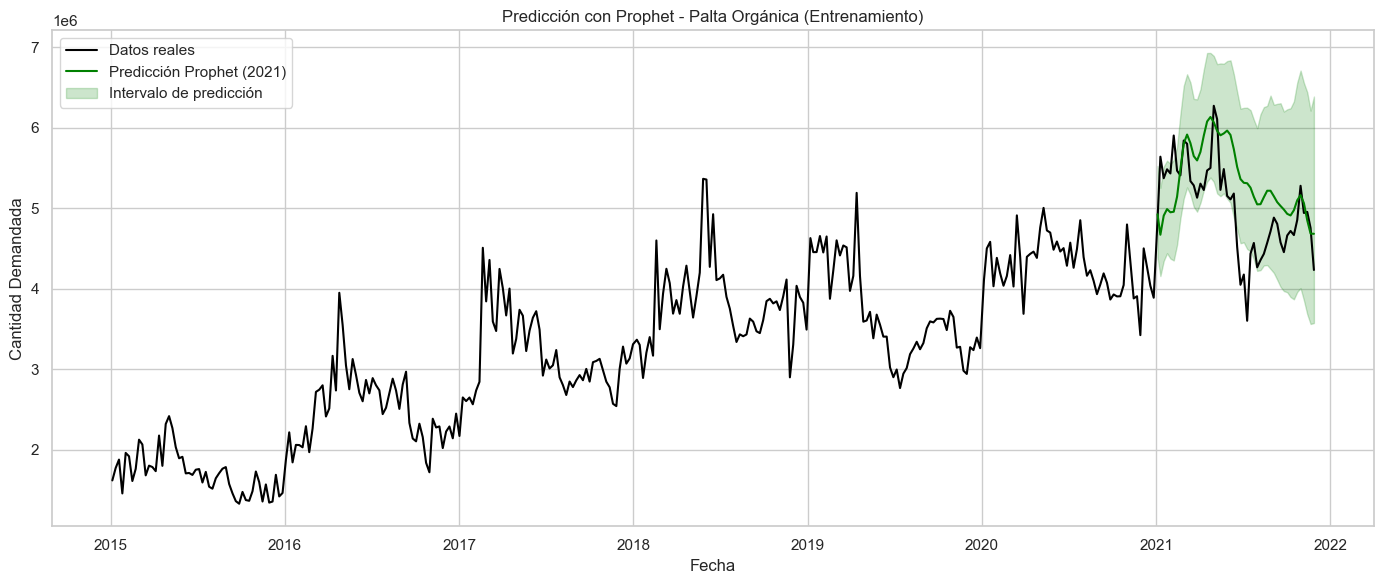

RMSE Prophet: 616557.07
MAE Prophet: 510153.76
MAPE Prophet: 10.75


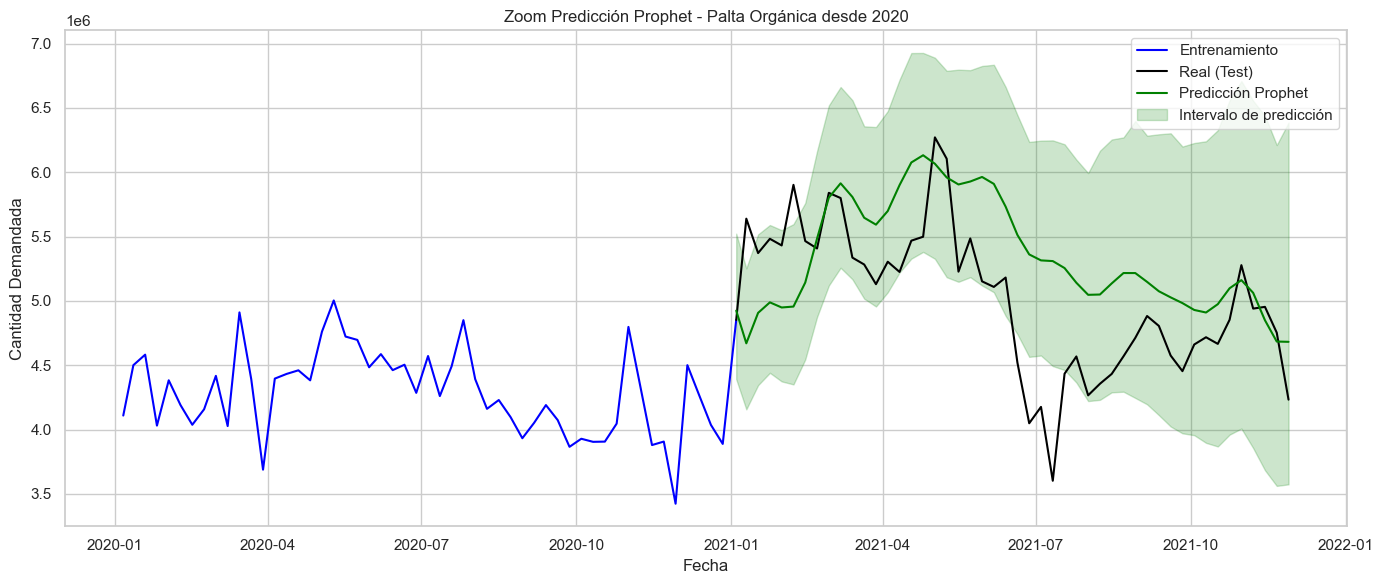


 Al implementar Prophet como modelo de forecasting para la palta orgánica, vale la pena comparar con nuestro modelo SARIMA antes implementado usando los indicadores de dispersión: 
Respecto al RMSE, Prophet arroja 616.557 vs SARIMA que arroja 510.805 -> esto señala que prophet comete errores absolutos más altos en predicción, es decir, estima valores más extremos. Sin embargo, no son para nada desproporcionados dado el contexto del dataset.
Respecto al MAE, Prophet arroja 510.154 vs SARIMA que arroja 410.863 -> esto señala que SARIMA tiene menor error absoluto medio. Tiene la misma interpretación al RMSE.
Respecto al MAPE, Prophet arroja 10,75% vs SARIMA que arroja 8,26% -> esto señala que SARIMA es más preciso en términos relativos, es decir, al momento de generalizar la predicción.

 En términos generales, podemos decir lo siguiente: SARIMA le gana en todos los indicadores de dispersión a Prophet, pero Prophet modela de mejor manera el comportamiento estacional brusco de la palta or

In [150]:
# Implementación Prophet para Palta Orgánica set de entrenamiento y testeo

# Preparar dataframe para prophet
prophet_train = org_train.reset_index()
prophet_train.columns = ['ds', 'y']

from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hacemos log-transform
prophet_train_log = prophet_train.copy()
prophet_train_log['y'] = np.log1p(prophet_train_log['y'])  # log(1 + y)

# Inicializar modelo 
model_prophet = Prophet(weekly_seasonality=True, yearly_seasonality=True)

# Entrenar 
model_prophet.fit(prophet_train_log, algorithm='LBFGS')

# Crear DataFrame futuro (número de semanas en test)
future = model_prophet.make_future_dataframe(periods=len(org_test), freq='W')

# Predicción
forecast = model_prophet.predict(future)

# ------------------ GRÁFICO 1: PREDICCIÓN SOLO EN PERIODO DE TEST ------------------ #

# Convertimos a escala real las columnas de interés
forecast['yhat_real'] = np.expm1(forecast['yhat'])
forecast['yhat_lower_real'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper_real'] = np.expm1(forecast['yhat_upper'])

# Filtrar predicción solo del periodo de test (2021)
forecast_test = forecast.set_index('ds').loc[org_test.index]

# Concatenar datos reales (entrenamiento + test)
real_full = pd.concat([prophet_train.set_index('ds')['y'], org_test])
real_full = real_full.sort_index()

plt.figure(figsize=(14, 6))

# Línea continua con datos reales
plt.plot(real_full.index, real_full.values, label='Datos reales', color='black')

# Línea de predicción Prophet en 2021
plt.plot(forecast_test.index, forecast_test['yhat_real'], label='Predicción Prophet (2021)', color='green')

# Banda de incertidumbre (intervalo de predicción)
plt.fill_between(
    forecast_test.index,
    forecast_test['yhat_lower_real'],
    forecast_test['yhat_upper_real'],
    color='green',
    alpha=0.2,
    label='Intervalo de predicción'
)

plt.title('Predicción con Prophet - Palta Orgánica (Entrenamiento)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()
# ------------------ MÉTRICAS Y PREPARACIÓN PARA ZOOM ------------------ #

# Extraer solo valores de test
forecast_filtered = forecast.set_index('ds').loc[org_test.index]
y_pred_prophet_real = np.expm1(forecast_filtered['yhat'])

# Métricas reales
rmse_prophet = np.sqrt(mean_squared_error(org_test, y_pred_prophet_real))
mae_prophet = mean_absolute_error(org_test, y_pred_prophet_real)
mape_prophet = np.mean(np.abs((org_test - y_pred_prophet_real) / org_test)) * 100

print(f'RMSE Prophet: {rmse_prophet:.2f}')
print(f'MAE Prophet: {mae_prophet:.2f}')
print(f'MAPE Prophet: {mape_prophet:.2f}')

# ------------------ GRÁFICO 2: ZOOM CON INTERVALOS ------------------ #

# Intervalos en escala real
yhat = np.expm1(forecast_filtered['yhat'])
yhat_lower = np.expm1(forecast_filtered['yhat_lower'])
yhat_upper = np.expm1(forecast_filtered['yhat_upper'])

start_zoom = '2020-01-01'

plt.figure(figsize=(14, 6))
plt.plot(org_train[org_train.index >= start_zoom], label='Entrenamiento', color='blue')
plt.plot(org_test[org_test.index >= start_zoom], label='Real (Test)', color='black')
plt.plot(yhat[yhat.index >= start_zoom], label='Predicción Prophet', color='green')
plt.fill_between(yhat[yhat.index >= start_zoom].index,
                 yhat_lower[yhat.index >= start_zoom],
                 yhat_upper[yhat.index >= start_zoom],
                 color='green', alpha=0.2, label='Intervalo de predicción')
plt.title('Zoom Predicción Prophet - Palta Orgánica desde 2020')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()

print('\n Al implementar Prophet como modelo de forecasting para la palta orgánica, vale la pena comparar con ' \
'nuestro modelo SARIMA antes implementado usando los indicadores de dispersión: ')
print('Respecto al RMSE, Prophet arroja 616.557 vs SARIMA que arroja 510.805 -> esto señala que prophet comete errores ' \
'absolutos más altos en predicción, es decir, estima valores más extremos. Sin embargo, no son para nada desproporcionados ' \
'dado el contexto del dataset.')
print('Respecto al MAE, Prophet arroja 510.154 vs SARIMA que arroja 410.863 -> esto señala que SARIMA tiene menor ' \
'error absoluto medio. Tiene la misma interpretación al RMSE.')
print('Respecto al MAPE, Prophet arroja 10,75% vs SARIMA que arroja 8,26% -> esto señala que SARIMA es más preciso ' \
'en términos relativos, es decir, al momento de generalizar la predicción.')

print('\n En términos generales, podemos decir lo siguiente: SARIMA le gana en todos los indicadores de dispersión ' \
'a Prophet, pero Prophet modela de mejor manera el comportamiento estacional brusco de la palta orgánica. ' \
'La pregunta es: ¿cuál elegir? -> SARIMA es mejor si importa la precisión numérica promedio y si queremos ' \
'evitar sobreestimaciones o subestimaciones sistemáticas en las ventas, es decir, apuntar a tener un stock de ' \
'inventario estable. Elegimos Prophet si necesitamos un modelo reactivo, capaz de ajustarse a estacionalidades ' \
'cambiantes que detecta comportamientos inesperados o picks de demanda.')

22:33:54 - cmdstanpy - INFO - Chain [1] start processing
22:33:54 - cmdstanpy - INFO - Chain [1] done processing


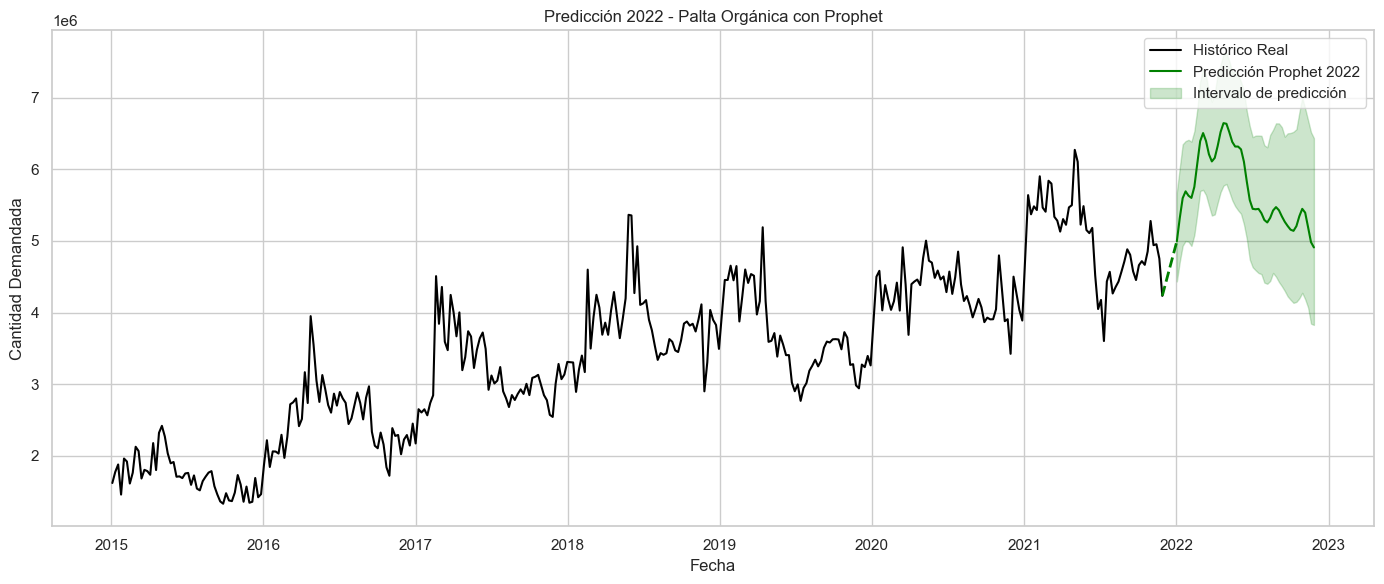

In [151]:
# Implementación Prophet para predicción demanda Palta Orgánica 2022

from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Preparación de datos ---
# Re-definición de variables para evitar ambiguedades en el dataframe
df4_org = weekly_data[weekly_data['type'] == 'Organic'].copy()
df4_org = df4_org.set_index('Date')
weekly_data_org = df4_org[['TotalVolume']].rename(columns={'TotalVolume': 'y'})

weekly_data_org.index = pd.to_datetime(weekly_data_org.index)
weekly_data_org = weekly_data_org.sort_index()
weekly_data_org = weekly_data_org.asfreq('W') 
weekly_data_org = weekly_data_org.interpolate(method='linear')

prophet_full = weekly_data_org.reset_index()
prophet_full.columns = ['ds', 'y']
prophet_full_log = prophet_full.copy()
prophet_full_log['y'] = np.log1p(prophet_full_log['y'])

# --- Entrenamiento modelo ---
model_full = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model_full.fit(prophet_full_log, algorithm='LBFGS')

# --- Predicción 2022 ---
future_full = model_full.make_future_dataframe(periods=52, freq='W')
forecast_full = model_full.predict(future_full)

forecast_full['yhat_real'] = np.expm1(forecast_full['yhat'])
forecast_full['yhat_lower_real'] = np.expm1(forecast_full['yhat_lower'])
forecast_full['yhat_upper_real'] = np.expm1(forecast_full['yhat_upper'])

# --- Gráfico completo ---
plt.figure(figsize=(14,6))
plt.plot(weekly_data_org, label='Histórico Real', color='black')

# Predicción desde 2022
forecast_2022 = forecast_full[forecast_full['ds'] >= '2022-01-01']
plt.plot(forecast_2022['ds'], forecast_2022['yhat_real'], label='Predicción Prophet 2022', color='green')
plt.fill_between(forecast_2022['ds'], 
                 forecast_2022['yhat_lower_real'], 
                 forecast_2022['yhat_upper_real'], 
                 color='green', alpha=0.2, label='Intervalo de predicción')

# --- Línea discontinua de conexión entre 2021 y 2022 ---
last_2021_date = weekly_data_org.index.max()
last_2021_value = weekly_data_org.loc[last_2021_date, 'y']
first_2022_date = forecast_2022['ds'].min()
first_2022_value = forecast_2022[forecast_2022['ds'] == first_2022_date]['yhat_real'].values[0]

plt.plot([last_2021_date, first_2022_date],
         [last_2021_value, first_2022_value],
         color='green', linestyle='dashed', linewidth=2)

# --- Estética ---
plt.title('Predicción 2022 - Palta Orgánica con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Demandada')
plt.legend()
plt.tight_layout()
plt.show()

In [152]:
# Crear DataFrame con predicción de 2022 Palta Orgánica
forecast_df4_palta_organica = pd.DataFrame({
    'Fecha': forecast_2022['ds'],
    'Prediccion_TotalVolume': forecast_2022['yhat_real'].values,
    'Lower_CI_90%': forecast_2022['yhat_lower_real'].values,
    'Upper_CI_90%': forecast_2022['yhat_upper_real'].values
})

# Establecer la columna de fecha como índice
forecast_df4_palta_organica.set_index('Fecha', inplace=True)

# Mostrar forecasting palta orgánica 2022
print(forecast_df4_palta_organica)

            Prediccion_TotalVolume  Lower_CI_90%  Upper_CI_90%
Fecha                                                         
2022-01-02            4.994367e+06  4.434576e+06  5.675246e+06
2022-01-09            5.317490e+06  4.707962e+06  6.019397e+06
2022-01-16            5.596822e+06  4.932207e+06  6.347960e+06
2022-01-23            5.691623e+06  4.999185e+06  6.392939e+06
2022-01-30            5.630788e+06  4.988056e+06  6.411656e+06
2022-02-06            5.600270e+06  4.929889e+06  6.385443e+06
2022-02-13            5.754080e+06  5.082477e+06  6.530780e+06
2022-02-20            6.077362e+06  5.375427e+06  6.833545e+06
2022-02-27            6.391918e+06  5.696620e+06  7.227434e+06
2022-03-06            6.505443e+06  5.713017e+06  7.398535e+06
2022-03-13            6.395210e+06  5.641224e+06  7.317150e+06
2022-03-20            6.209732e+06  5.493929e+06  7.063574e+06
2022-03-27            6.109630e+06  5.353715e+06  6.943500e+06
2022-04-03            6.159171e+06  5.369511e+06  7.060

In [153]:
# Exportación forecasting Palta Orgánica a csv

# Ajustar nombre de columna final para compatibilidad
forecast_df4_palta_organica['TotalVolume'] = forecast_df4_palta_organica['Prediccion_TotalVolume']

# Crear nuevo dataframe solo con columnas necesarias
export_df4_org = forecast_df4_palta_organica[['TotalVolume', 'Lower_CI_90%', 'Upper_CI_90%']].copy()
export_df4_org.index.name = 'Date'

# Exportar a CSV
export_df4_org.to_csv('predicción_2022_palta_organica.csv')

# Confirmar exportación
print('Archivo CSV exportado exitosamente con las predicciones de palta orgánica 2022')

Archivo CSV exportado exitosamente con las predicciones de palta orgánica 2022
